In [110]:
import cv2
import matplotlib.pyplot as plt
image=cv2.imread(r"test image.jpg")


Text(0.5, 1.0, 'Image with object(cup)')

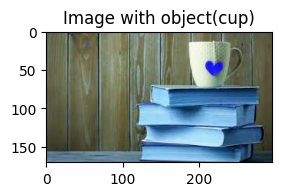

In [111]:
plt.subplot(224), plt.imshow(image, cmap="gray"),
plt.title('Image with object(cup)')

Text(0.5, 1.0, 'Cup extraction')

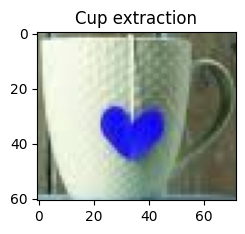

In [112]:
#We extract the cup from the photo
plt.subplot(224), plt.imshow(image[12:73,185:257]),
plt.title('Cup extraction')

In [113]:
# Downloading the template image
cv2.imwrite("template image.jpg",image[12:73,185:257])

True

Text(0.5, 1.0, 'Cup')

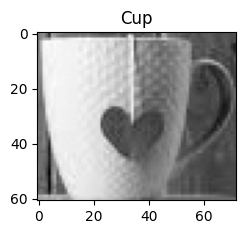

In [114]:
# Read both image in gray
template = cv2.imread('template image.jpg',cv2.IMREAD_GRAYSCALE)          
image = cv2.imread('test image.jpg',cv2.IMREAD_GRAYSCALE)
plt.subplot(224), plt.imshow(template, cmap="gray"),
plt.title('Cup')

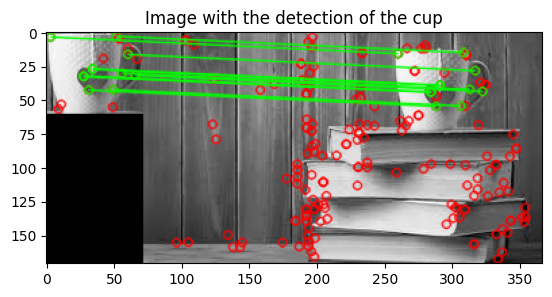

(<matplotlib.image.AxesImage at 0x1c4fa56ee50>, None)

In [117]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(template,None)
kp2, des2 = sift.detectAndCompute(image,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(template,kp1,image,kp2,matches,None,**draw_params)
plt.title("Image with the detection of the cup")
plt.imshow(img3,),plt.show()
